In [56]:
from scipy.stats import binom
from scipy.stats import probplot
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Binomial Distributions are very important within analytics as they are usually the culmination of previous experiments, resulting in questions like click/don't click, buy/don't buy, subscribe/don't subscribe etc. A central part of understanding binomial distributions is the existence of a set of trials, each with a definite probability of occurring, such as a coin flip being 50/50.\
Not all binomial trials need to have equal chances of occurring, so long as they add up to 1.0, for example 70/30 or 40/60.\
It is common to assign the 'success' outcome the number 1, with the other being assigned to 0. This is also true with the rarest outcome being assigned to 1, for example, fraudulent transactions are more rare than normal transactions so they would be assigned to 1 rather than 0. 

The binomial distribution is the frequency distribution of the number of successes (x) in a given number of trials (n) with specified probability (p). To simplify this, an example would be how likely is it that you achieve 0 sales (successes or 'x') within 200 clicks (trials or 'n') when the probability of a click becoming a sale is 0.02 (probability or 'p')?\
In this example, x=0, n=200 and p=0.02\
To answer this we plug these numbers into scipy.stats.binom

binom.pmf() stands for probability mass function, this will give us the exact probability of a specific number of events occurring, it will tell us the probability of exactly x=0 or x=2.
binom.cdf() stands for cumulative density function and this will tell us the probability of x or fewer events occurring, so the chances that 2 events or fewer will occur in 'n' trials.\ 

In [30]:
binom.pmf(0,n=200,p=0.02)

0.017587946605721567

As we used binom.cdf() the result is the probability that the event will occur 4 times or less, so it is more there is a 62% chance that the event will occur from 0 - 4 times. We can see the difference in results from using .pmf() and .cdf()\
Also, from experimenting with .pmf() we can see that using x=4 results in the highest probability result, using x<=3 or x>=5 results in the probability decreasing, this is because if we do (200 * 0.02) it equals 4.0. Therefore it would make sense that the chance of 4 successes occurring would be the highest.\
As you increase the 'x' variable for cdf, the probability increases, if the p value is quite low then there is less chance for 2 or less (x) successes to occur, however if you use a high x value such as 20, then it is quite likely that you will achieve less than 20 successes (0.99).

In [41]:
binom.pmf(4,n=200,p=0.02)

0.19734860696728865

In [43]:
binom.cdf(4, n=200, p=0.02)

0.6288435801288308

The mean of a binomial distribution is (n * p), this gives the most common number of successes to occur, demonstrated previously with 200 * 0.02 = 4, which had the highest probability of occurring.\
The variance n * p(1-p)  = (200 * 0.02) * (1-0.02) = 3.92
To get the standard deviation you just square root the variance 3.92 ** 0.5 = 1.98

In [59]:
mean = 200 * 0.02
var = (200*0.02)*(1-0.02)
std = var**0.5
print(mean)
print(var)
print(std)

4.0
3.92
1.9798989873223332


If n is large or p is close to 0.50 then a binomial distribution can be quite indistinguishable from a normal distribution, demonstrated below using the same mean, standard deviation and sample size as above.

In [53]:
norm = np.random.normal(loc=4, scale=1.98, size=200)

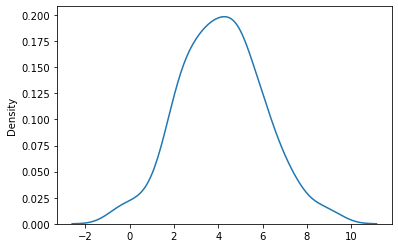

In [58]:
sns.kdeplot(norm)
plt.show()

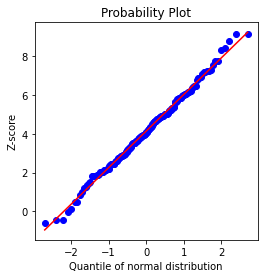

In [57]:
fig, ax = plt.subplots(figsize=(4,4))
norm_sample = norm
probplot(norm_sample, plot=ax)
ax.set_xlabel('Quantile of normal distribution')
ax.set_ylabel('Z-score')
plt.show()